In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
digits=load_digits()

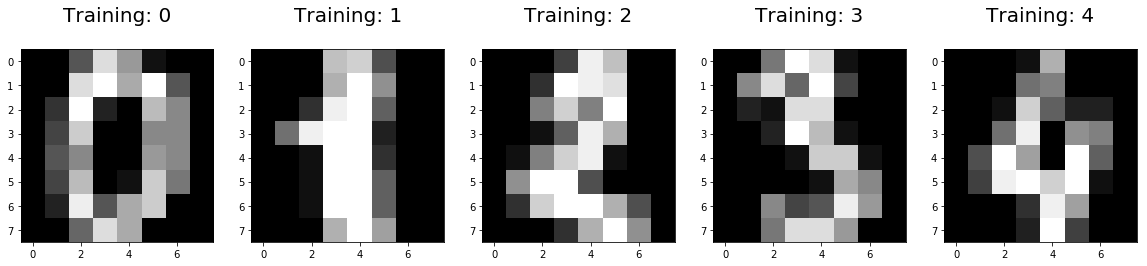

In [43]:
#diplaying some of images
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n ' % label, fontsize=20)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logisRegr=LogisticRegression()
logisRegr.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
#predicting the output of the first element of test set
print(logisRegr.predict(X_test[0].reshape(1,-1)))

[4]


In [15]:
#predicting the output of the first 10 of test set
logisRegr.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [16]:
#predicting the output of entire data set
predictions=logisRegr.predict(X_test)

In [36]:
#predicting accuracy of the model
score=logisRegr.score(X_test,y_test)
print(score)

0.9420289855072463


Text(0.5, 103.73999999999997, 'Predicted label')

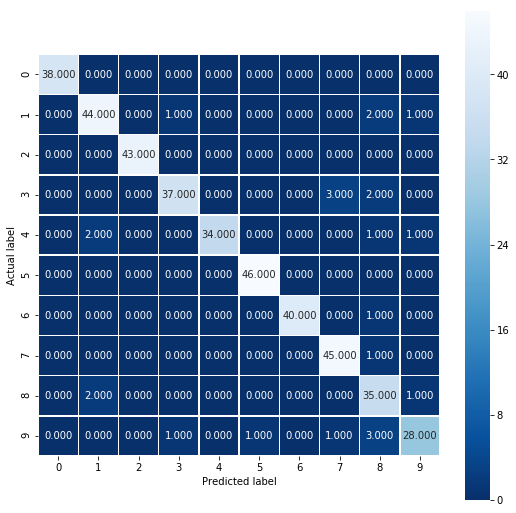

In [40]:
#confusion matrix in heatmap
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm ,annot=True,fmt=".3f",linewidths=0.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

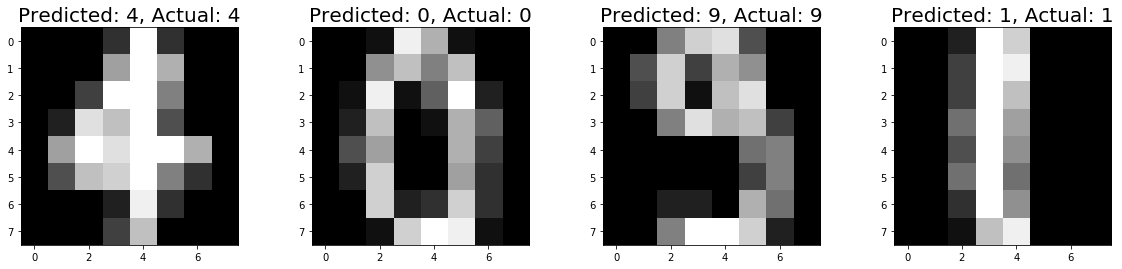

In [46]:
index=0
classifiedIndex=[]
for predict, actual in zip(predictions,y_test):
    if(predict==actual):
        classifiedIndex.append(index)
    index=index+1
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong],y_test[wrong]), fontsize=20)